In [10]:
# 4.1
from PIL import Image
import cv2 as cv
import numpy as np
from math import atan2, cos, sin, sqrt, pi
import os

def find_orientation(img):
    
    _, bw = cv.threshold(img, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
    
    for i, c in enumerate(contours):
        
      area = cv.contourArea(c)
     
      # Ignore contours that are too small or too large
      if area < 100 or 100000 < area:
        continue
 
    
      rect = cv.minAreaRect(c)
      box = cv.boxPoints(rect)
      box = np.intp(box)

      # Retrieve the key parameters of the rotated bounding box
      center = (int(rect[0][0]),int(rect[0][1])) 
      width = int(rect[1][0])
      height = int(rect[1][1])
      angle = int(rect[2])


      if width < height:
        angle = 90 - angle
      else:
        angle = -angle
    
      return angle

def align_shapes(template_path, input_directory, output_directory):
    template = cv.imread(template_path, cv.IMREAD_GRAYSCALE)
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(input_directory):
            remaining_shape = cv.imread(os.path.join(input_directory, filename), cv.IMREAD_GRAYSCALE)
            orientation_angle = find_orientation(remaining_shape)
            template_orientation = find_orientation(template)
            rotation_angle = template_orientation - orientation_angle
            rows, cols = remaining_shape.shape
            M = cv.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
            rotated_remaining_shape = cv.warpAffine(remaining_shape, M, (cols, rows))
            cv.imwrite(os.path.join(output_directory, f"{filename}_aligned"), rotated_remaining_shape)

template_path = 'KIMIA dataset/bonefishes.png'
input_directory = 'KIMIA dataset'
output_directory = '4.1_output'
align_shapes(template_path, input_directory, output_directory)


In [11]:
# 4.3
import numpy as np
import pickle
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load data from the pickle file
with open('SMAI-Dataset-problem-4.3/colors.pkl', 'rb') as file:
    data = pickle.load(file)
    
print(data.shape)

(100, 2)


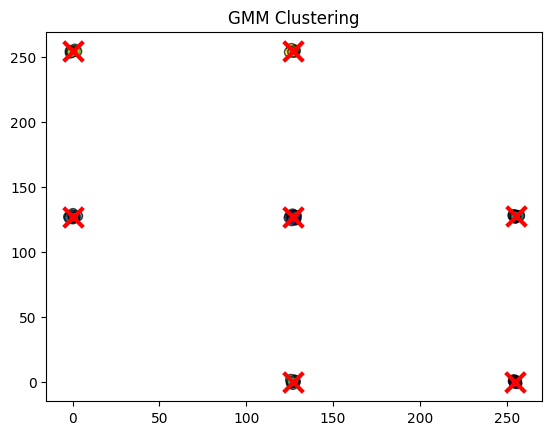

In [12]:
# Function to fit a GMM to the data and visualize the clusters
def fit_and_visualize_gmm(data, n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=21)
    gmm.fit(data)

    # Extract parameters
    means = gmm.means_
    covariances = gmm.covariances_
    
    # Predict the cluster assignments
    labels = gmm.predict(data)

    # Plot the data points and cluster centers
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k', alpha=0.7)
    plt.scatter(means[:, 0], means[:, 1], marker='x', s=200, linewidths=3, color='r')
    plt.title('GMM Clustering')
    plt.show()

    return means, covariances

# Function to generate a new dataset using GMM parameters
def generate_dataset(n, means, covariances):
    components = []
    for i in range(n):
        component = np.random.multivariate_normal(means[i], covariances[i], size=100)
        components.append(component)
    
    return np.vstack(components)

n_components = 7 

# Fit GMM and visualize clusters
means, covariances = fit_and_visualize_gmm(data, n_components)

# Generate a new dataset using the identified components
new_dataset = generate_dataset(n_components, means, covariances)

**Observations:**
The generated sample dataset closely resembles the original dataset in terms of color components, means, and covariances, suggesting that the provided parameters accurately describe the likely components of the dataset.